# Take a look at the dataset and how we preprocess it

In [1]:
import BALLROOM
import librosa
import numpy as np
from constants import *
from visualization import *
from preprocessing import *
from librosa.display import waveplot
from IPython.display import Audio
import matplotlib.pyplot as plt

Take a random song.

In [32]:
i = np.random.randint(len(BALLROOM.names))
print(BALLROOM.names[i])

Media-104516


Listen to the song with its beat track.

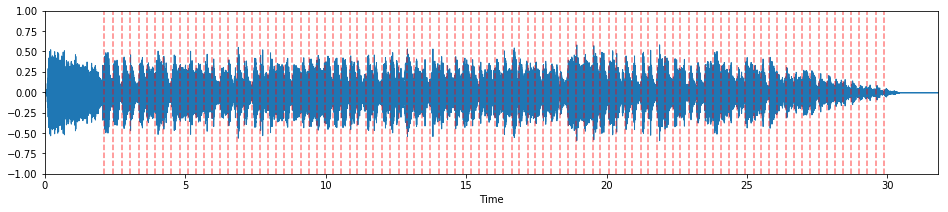

In [33]:
wav = librosa.load(BALLROOM.wav_file(i), sr)[0]
beats = BALLROOM.load_beats(i)
plt.figure(figsize=(16, 3))
librosa.display.waveplot(wav, sr)
plt.vlines(beats, -1, 1, color='r', alpha=0.5, linestyles='--')
plt.ylim(-1, 1);
clicks = librosa.clicks(times=beats, sr=sr, length=len(wav))
Audio(wav + clicks, rate=sr)

Show the spectrogram.

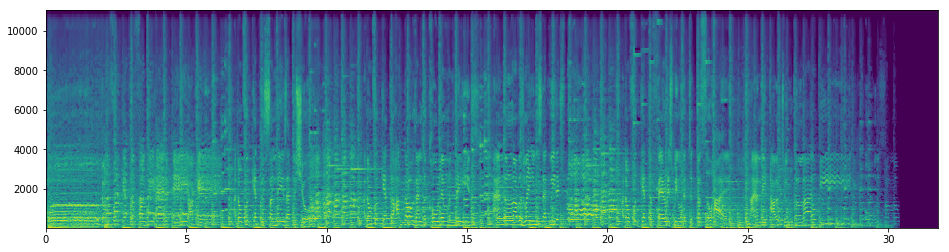

In [34]:
spec = get_spec(BALLROOM.wav_file(i))
showspec(spec)

See the onsets and the one we select according to the beat track.

In [49]:
onsets, isbeat = get_onsets_no_repeat(spec, beats)

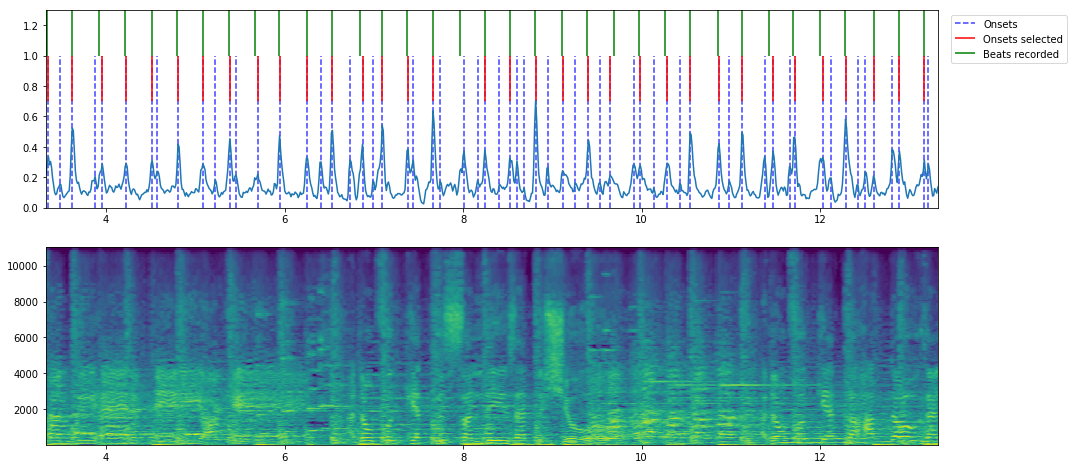

In [50]:
showdata(spec, onsets, isbeat, beats)#, offset=26, duration=1)

# Precompute

In [52]:
from preprocessing import *

In [56]:
N = 20
for i in range(0, N):
    spec = get_spec(BALLROOM.wav_file(i))
    np.save(BALLROOM.spec_file(i), spec)

    beats = BALLROOM.load_beats(i)
    onsets, isbeat = get_onsets_no_repeat(spec, beats)
    save_onsets(onsets, isbeat, BALLROOM.onset_file(i))
    
    print(f'{i+1:{len(str(N))}}/{N} | {BALLROOM.names[i]}')

 1/20 | Media-103515
 2/20 | Media-103516
 3/20 | Media-103517
 4/20 | Media-103611
 5/20 | Media-103612
 6/20 | Media-103613
 7/20 | Media-103614
 8/20 | Media-103619
 9/20 | Media-103713
10/20 | Media-103714
11/20 | Media-103718
12/20 | Media-103719
13/20 | Media-103813
14/20 | Media-103814
15/20 | Media-103819
16/20 | Media-103917
17/20 | Media-103918
18/20 | Media-103919
19/20 | Media-103920
20/20 | Media-104015


# Verify that the pre-computation worked

In [57]:
ballroom_dataset = BALLROOM.BALLROOM(N)

In [58]:
i = np.random.randint(len(ballroom_dataset))
print(i)

18


In [59]:
spec, onsets, isbeat = ballroom_dataset[i]
beats = BALLROOM.load_beats(i)

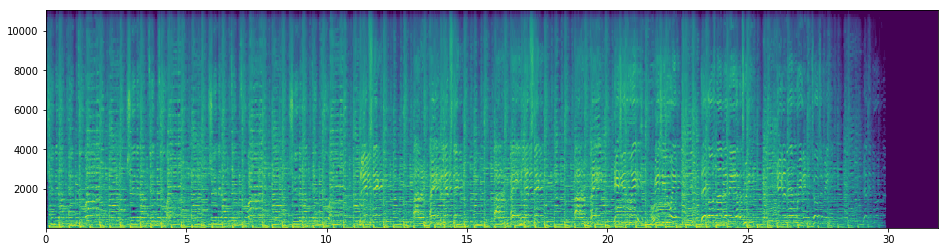

In [60]:
showspec(spec)

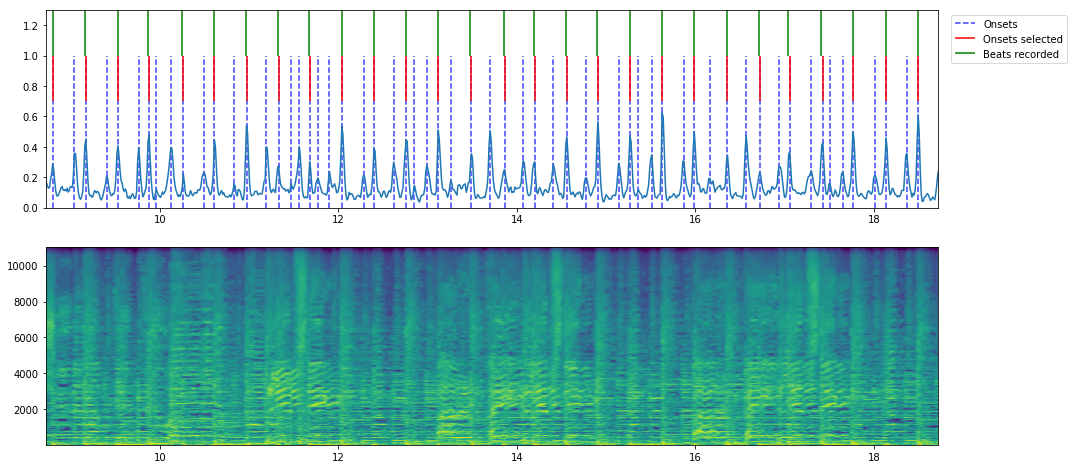

In [61]:
showdata(spec, onsets, isbeat, beats)

# Tests

In [14]:
beats = np.arange(0, 5, 0.5, dtype=np.float) + np.random.rand()

In [15]:
clicks = librosa.clicks(times=beats, sr=sr)

In [16]:
Audio(clicks, rate=sr)

In [17]:
librosa.output.write_wav('./tests/test.wav', clicks, sr)

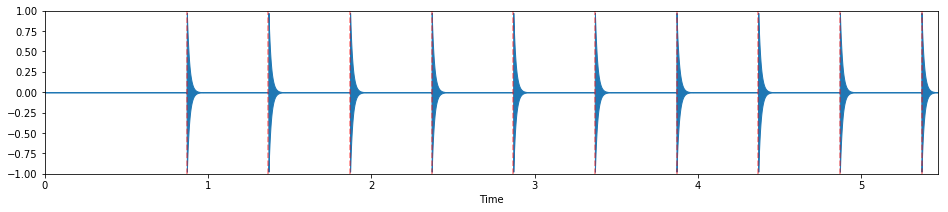

In [18]:
wav = librosa.load('./tests/test.wav', sr)[0]
plt.figure(figsize=(16, 3))
librosa.display.waveplot(wav, sr)
plt.vlines(beats, -1, 1, color='r', alpha=0.5, linestyles='--')
plt.ylim(-1, 1);
cclicks = librosa.clicks(times=beats, sr=sr, length=len(wav))
Audio(wav + cclicks, rate=sr)

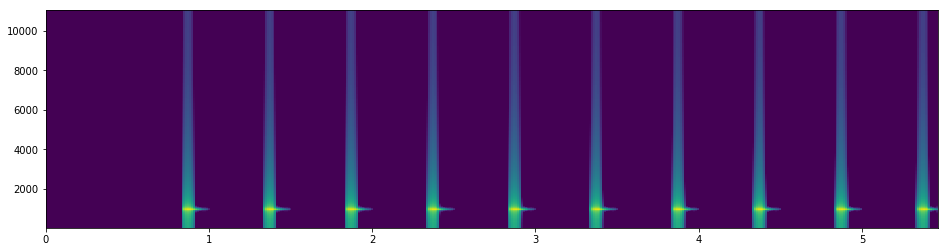

In [19]:
spec = get_spec('./tests/test.wav')
showspec(spec)

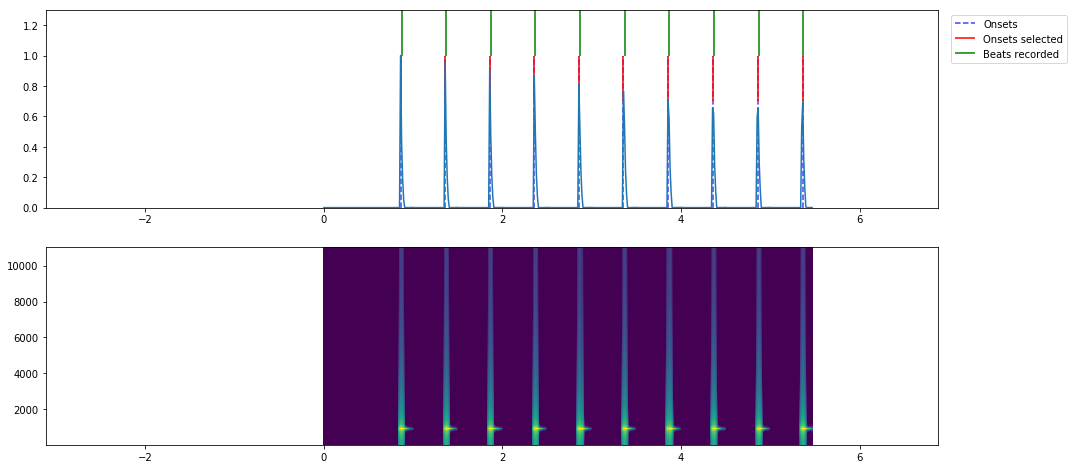

In [20]:
onsets, isbeat = get_onsets_no_repeat(spec, beats)
showdata(spec, onsets, isbeat, beats)

In [21]:
onsets_times = librosa.frames_to_time(onsets, sr, hl)

In [22]:
clickss = librosa.clicks(times=onsets_times, sr=sr, length=len(wav))
Audio(wav + clickss, rate=sr)

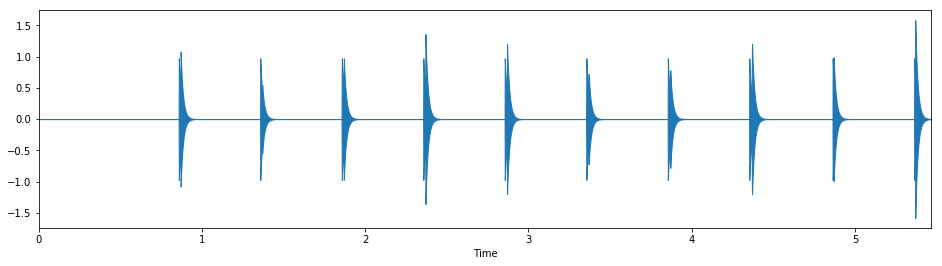

In [23]:
plt.figure(figsize=(16, 4))
librosa.display.waveplot(wav + clickss, sr)